In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Loading the Dataset

data = pd.read_csv('index.csv')
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [3]:
# Display the first few rows of the dataset
print(data.head())


# Display the last few rows of the dataset
data.tail()

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


,date,datetime,cash_type,card,money,coffee_name
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte
1132,2024-07-31,2024-07-31 21:55:16.570,card,ANON-0000-0000-0446,32.82,Latte


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
data.shape

(1133, 6)

In [6]:
# Step 2: Data Cleaning

# Checking for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Convert 'datetime' to a proper datetime object
data['datetime'] = pd.to_datetime(data['datetime'])

# Ensure 'money' column is numeric
data['money'] = pd.to_numeric(data['money'], errors='coerce')

# Re-check for missing or incorrect data
data.info()


Missing values per column:
 date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   object        
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 53.2+ KB


In [7]:
# Removing rows with missing card values
data_cleaned = data.dropna(subset=['card'])

# Checking that missing values are removed
print("Missing values after removing rows with missing 'card':\n", data_cleaned.isnull().sum())


Missing values after removing rows with missing 'card':
 date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64


# Descriptive Analysis

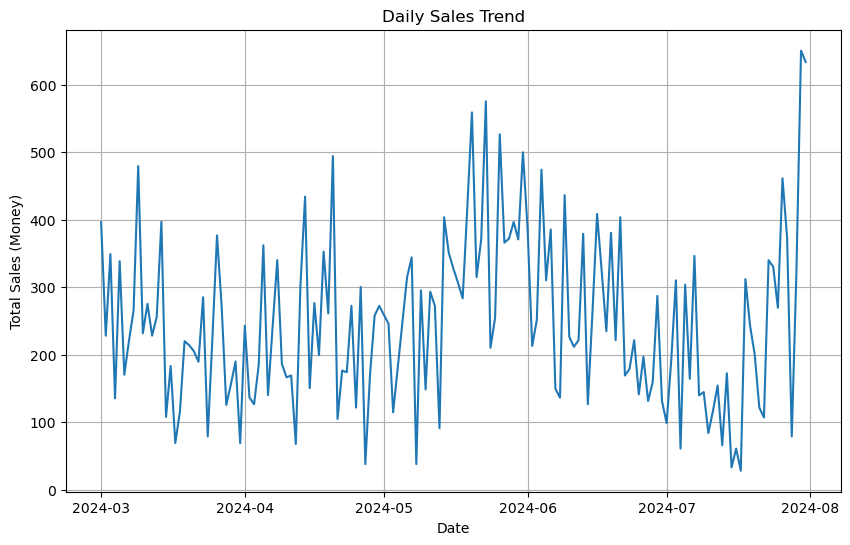

In [8]:
# Sales trends over time

# Grouping sales by date to see the daily sales trend
daily_sales = data.groupby(data['datetime'].dt.date)['money'].sum()

# Plotting daily sales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (Money)')
plt.grid(True)
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


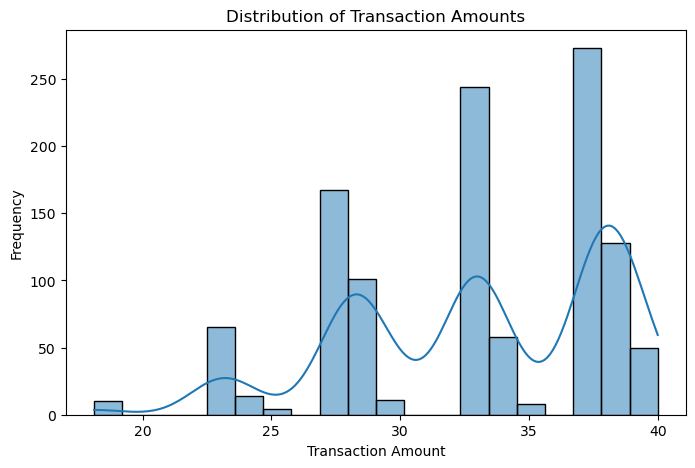

In [9]:
# Display distribution of the sales (money column)
# Plot distribution of sales
plt.figure(figsize=(8, 5))
sns.histplot(data['money'], bins=20, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

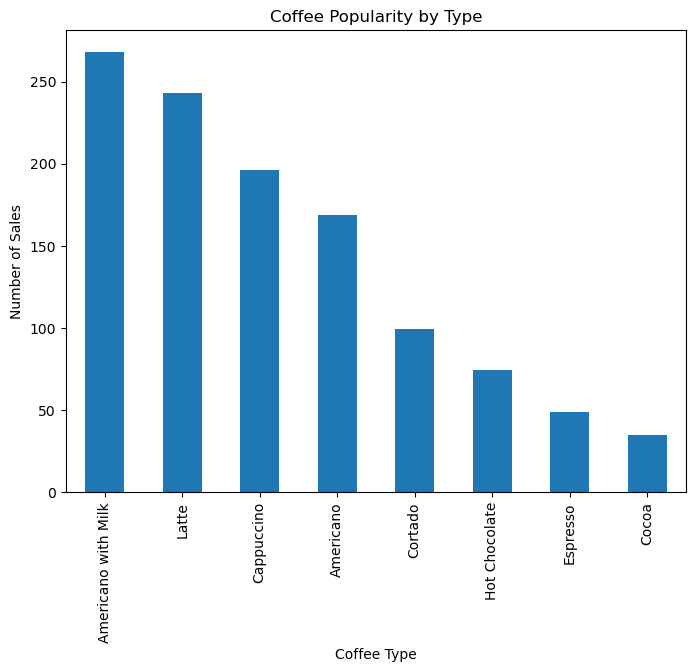

In [10]:
#  Popular coffee types

# Counting the frequency of each coffee type
coffee_counts = data['coffee_name'].value_counts()

# Plotting the popularity of coffee types
plt.figure(figsize=(8, 6))
coffee_counts.plot(kind='bar')
plt.title('Coffee Popularity by Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Sales')
plt.show()


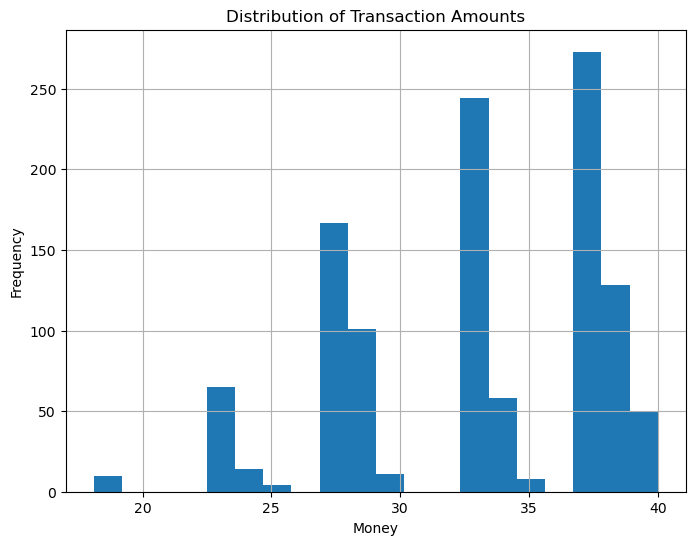

In [11]:
# Transaction amounts distribution

# Plotting the distribution of money spent per transaction
plt.figure(figsize=(8, 6))
data['money'].plot(kind='hist', bins=20)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


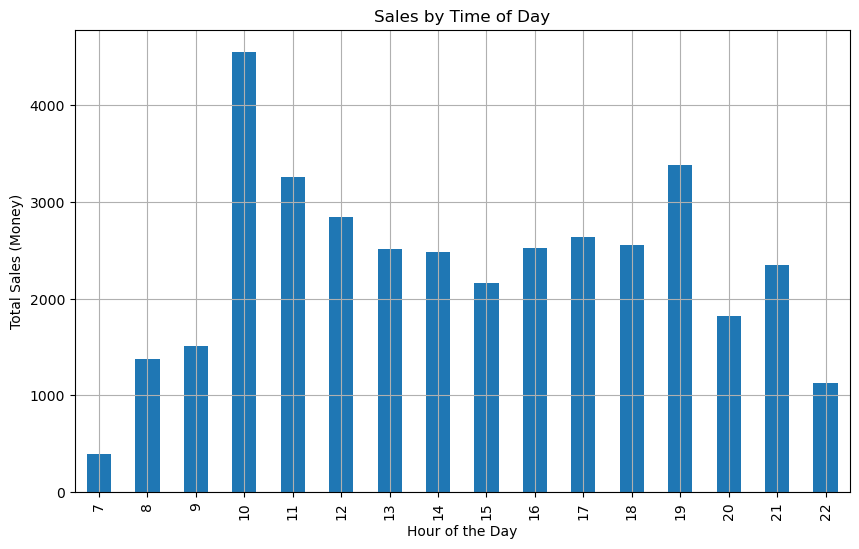

In [12]:
# Time-based preferences (morning, afternoon, evening sales)

# Extracting the hour from the 'datetime' column
data['hour'] = data['datetime'].dt.hour

# Grouping by hour to find sales by time of day
hourly_sales = data.groupby('hour')['money'].sum()

# Plotting sales by time of day
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar')
plt.title('Sales by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales (Money)')
plt.grid(True)
plt.show()


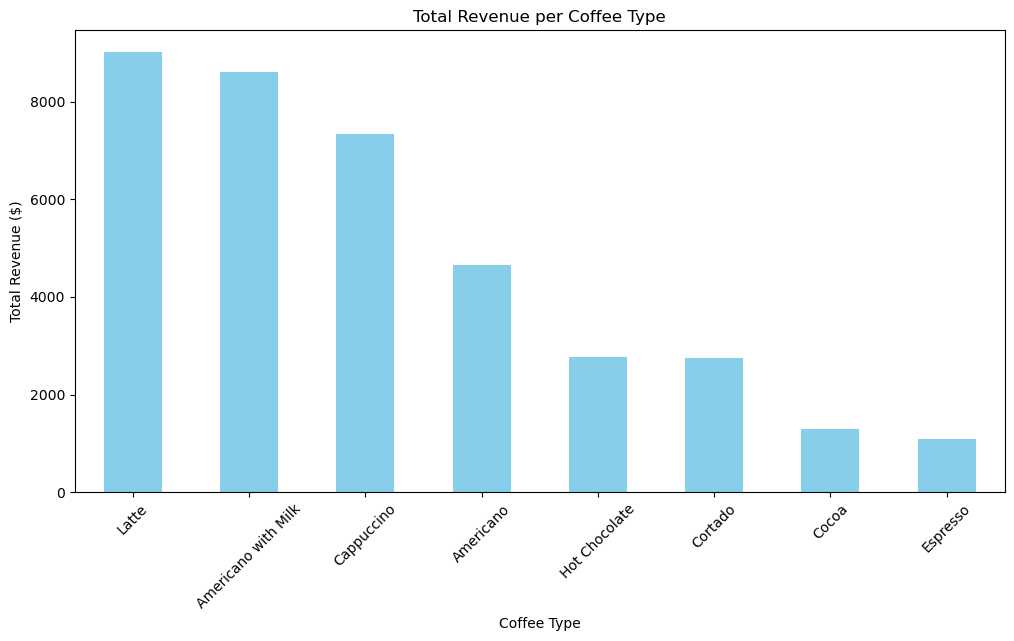

In [13]:
# Calculate total revenue per coffee type
revenue_per_coffee = data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

# Visualize the total revenue per coffee type
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
revenue_per_coffee.plot(kind='bar', color='skyblue')
plt.title('Total Revenue per Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()


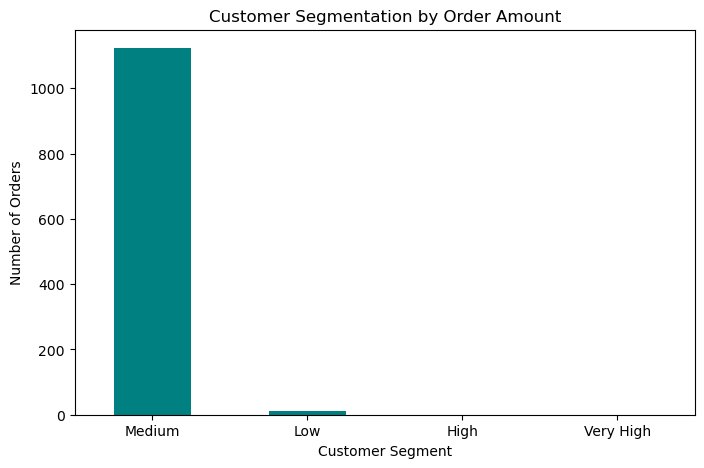

In [14]:
# Create customer segments based on money spent
data['customer_segment'] = pd.cut(data['money'], bins=[0, 20, 40, 60, 100], labels=['Low', 'Medium', 'High', 'Very High'])

# Count orders in each segment
customer_segment_count = data['customer_segment'].value_counts()

# Visualize customer segments
plt.figure(figsize=(8, 5))
customer_segment_count.plot(kind='bar', color='teal')
plt.title('Customer Segmentation by Order Amount')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


In [15]:
# Identifying loyal customers (cards with multiple transactions)

# Counting the number of transactions per card
loyal_customers = data['card'].value_counts()

# Filtering for customers who made more than X transactions (loyal customers)
loyal_customers = loyal_customers[loyal_customers > 5] # We can set threshold as needed

print(f"Loyal customers (more than 5 transactions):\n{loyal_customers}")


Loyal customers (more than 5 transactions):
card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
ANON-0000-0000-0001    17
ANON-0000-0000-0141    17
ANON-0000-0000-0059    12
ANON-0000-0000-0024    12
ANON-0000-0000-0180    12
ANON-0000-0000-0134    11
ANON-0000-0000-0206     9
ANON-0000-0000-0276     9
ANON-0000-0000-0004     9
ANON-0000-0000-0142     8
ANON-0000-0000-0154     8
ANON-0000-0000-0153     7
ANON-0000-0000-0019     7
ANON-0000-0000-0164     7
ANON-0000-0000-0384     7
ANON-0000-0000-0192     7
ANON-0000-0000-0375     6
ANON-0000-0000-0118     6
ANON-0000-0000-0050     6
ANON-0000-0000-0017     6
Name: count, dtype: int64


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


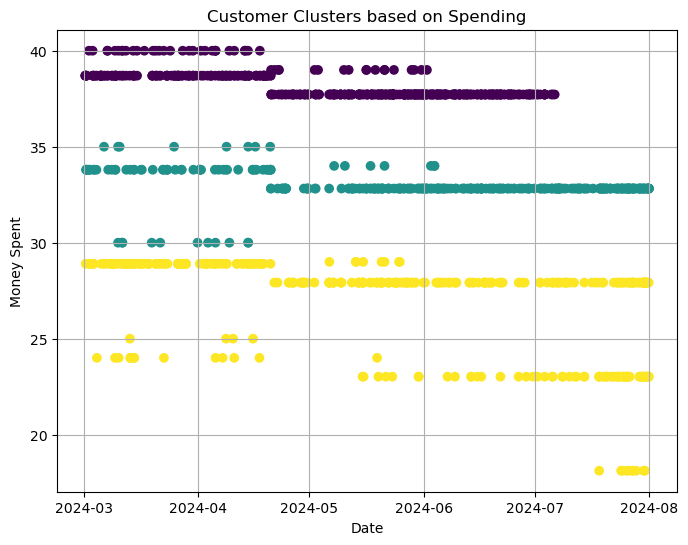

In [16]:
# Clustering based on spending behavior 
from sklearn.cluster import KMeans
import numpy as np

# Prepare the data for clustering (e.g., only 'money' column)
spending_data = data[['money']].dropna()

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3)  # Number of clusters can be adjusted
data['cluster'] = kmeans.fit_predict(spending_data)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['datetime'], data['money'], c=data['cluster'], cmap='viridis')
plt.title('Customer Clusters based on Spending')
plt.xlabel('Date')
plt.ylabel('Money Spent')
plt.grid(True)
plt.show()


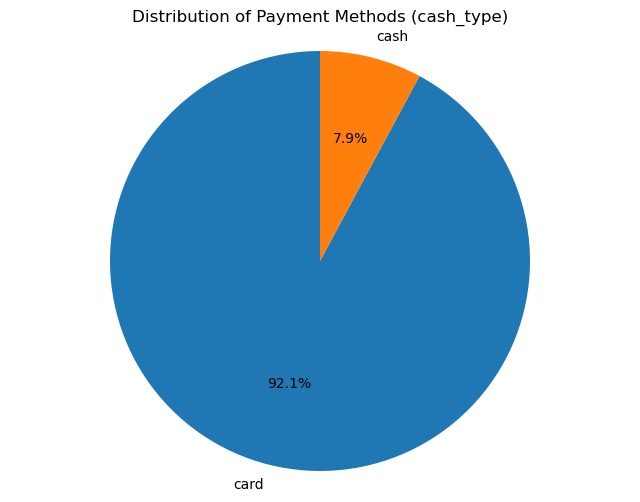

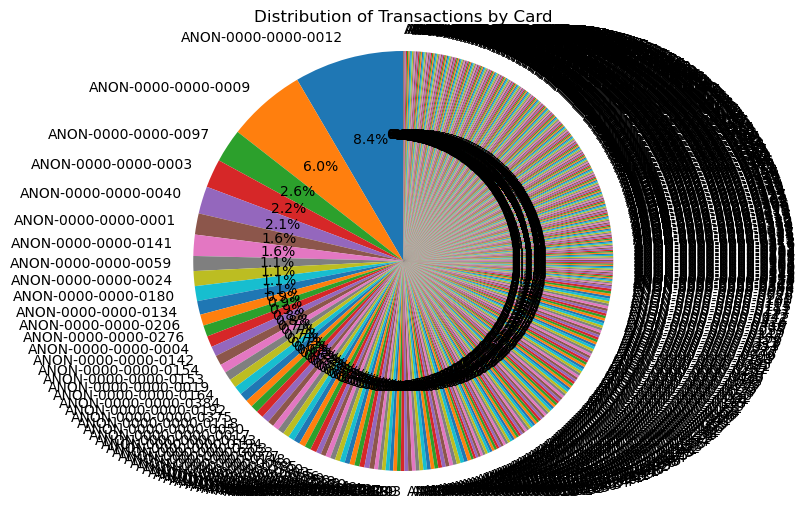

In [17]:
# Pie chart for 'cash_type'
cash_type_counts = data['cash_type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cash_type_counts, labels=cash_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Methods (cash_type)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

# Pie chart for 'card'
card_counts = data['card'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(card_counts, labels=card_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transactions by Card')
plt.axis('equal')  
plt.show()
